
# Análise de Dados Estaduais - Tarefa 4 (2023) 🗂️

Notebook referente à Tarefa 4 do ano de 2023.  
Focado na análise de dados estaduais, incluindo importação, tratamento e geração de estatísticas descritivas e visuais.

---


# Análise exploratória completa para um estado do Brasil

- Usar os dados de 2023 salvos na Tarefa 1 (“seguro-rural-2023.xlsx”)
- Cada aluno vai selecionar os dados de um estado (o estado a ser estudado será enviado por e-mail) e todas as análises serão feitas considerando esse estado. Para isso, na célula onde eu escolhi MG, escolha os dados do estado atribuído a você:

df = df_br[df_br['uf'] == 'MG']

df = df.reset_index(drop=True) # iniciar os índices em 0

df.head()

- Modifique as interpretações feitas no notebook de modelo, adaptando para os seus dados (as interpretações se encontram numeradas no notebook de modelo):

1.   Interpretação do resumo estatístico;
2.   Interpretação do gráfico de colunas com as dez culturas mais seguradas;
3.   Interpretação do gráfico comparativo das somas dos valores de prêmio, subvenção e indenização das dez culturas mais seguradas;
4.   Interpretação do gráfico de pizza com a porcentagem das apólices de cada cultura;
5.   Interpretação do gráfico de pizza com a porcentagem das apólices de cada tipo de cultura;
6.   Interpretação do histograma dos valores de prêmio;
7.   Interpretação do boxplot dos valores de prêmio;
8.   Interpretação das correlações entre as variáveis.


Importar pacotes necessários:

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive, files
import os
pd.set_option('display.max_columns', 50)             # permite a visualização de 50 colunas do dataframe
pd.options.display.float_format = '{:.2f}'.format    # pandas: para todos os números aparecerem com duas casas decimais

# parte gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura dos dados

Lendo a partir do *google drive*.

In [ ]:
# demora um pouco
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/dados/')
seg = pd.read_excel("seguro-rural-2023.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = seg.copy()    # fazer cópia do objeto seg em df
df = df.fillna(0)    # substituir nan por 0
df.dropna(inplace=True, how='all')
df.dropna(inplace=True)
df['animal'] = df['animal'].replace(['-', '...', 'X'], 0).astype(int)   # substituir variável 'animal' com '-', '...' e 'X' por 0
# simplificar os tipos de seguro da variável 'tipo'
df['tipo'] = df['tipo'].replace({'CUSTEIO': 'custeio',
                    'PRODUTIVIDADE': 'produtividade',
                    'FLORESTAS': 'florestas',
                    'RECEITA': 'receita',
                    'PECUÁRIO': 'pecuário'})
# simplificar os nomes de eventos preponderantes da variável 'evento'
df['evento'] = df['evento'].replace({'0':'nenhum',
                      'SECA': 'seca',
                      'GEADA': 'geada',
                      'CHUVA EXCESSIVA': 'chuva',
                      'GRANIZO': 'granizo',
                      'VENTOS FORTES/FRIOS': 'vento',
                      'INUNDAÇÃO/TROMBA D´ÁGUA': 'inundação',
                      'VARIAÇÃO EXCESSIVA DE TEMPERATURA': 'temp.',
                      'INCÊNDIO': 'incêndio',
                      'DEMAIS CAUSAS': 'outras',
                      'VARIAÇÃO DE PREÇO': 'var. preço',
                      'REPLANTIO': 'replantio',
                      'RAIO': 'raio',
                      'MORTE': 'morte',
                      'QUEDA DE PARREIRAL': 'queda parr.',
                      'PERDA DE QUALIDADE': 'perda qual.',
                      'DOENÇAS E PRAGAS': 'doenças'})
# categorizar os tipos de culturas (nova coluna)
df['tipo_cultura'] = df['cultura'].replace({'Soja': 'grãos',
                                            'Milho 1ª safra': 'grãos',
                                            'Milho 2ª safra': 'grãos',
                                            'Cana-de-açúcar': 'perenes',
                                            'Trigo': 'grãos',
                                            'Feijão 1ª safra': 'leguminosas',
                                            'Sorgo': 'grãos',
                                            'Café': 'perenes',
                                            'Cevada': 'sementes',
                                            'Batata': 'hortaliças',
                                            'Arroz': 'grãos',
                                            'Aveia': 'grãos',
                                            'Canola': 'grãos',
                                            'Algodão': 'grãos',
                                            'Mandioca': 'hortaliças',
                                            'Feijão 2ª safra': 'leguminosas',
                                            'Amendoim': 'leguminosas',
                                            'Triticale': 'grãos',
                                            'Pecuário': 'perenes',
                                            'Cebola': 'hortaliças',
                                            'Alho': 'hortaliças',
                                            'Melancia': 'frutas',
                                            'Tomate': 'hortaliças',
                                            'Girassol': 'grãos',
                                            'Abóbora': 'hortaliças',
                                            'Atemoia': 'frutas',
                                            'Cenoura': 'hortaliças',
                                            'Couve-flor': 'hortaliças',
                                            'Goiaba': 'frutas',
                                            'Laranja': 'frutas',
                                            'Tangerina': 'frutas',
                                            'Melão': 'frutas',
                                            'Pepino': 'hortaliças',
                                            'Pimentão': 'hortaliças',
                                            'Repolho': 'hortaliças',
                                            'Uva': 'frutas',
                                            'Beterraba': 'hortaliças',
                                            'Ameixa': 'frutas',
                                            'Chuchu': 'hortaliças',
                                            'Kiwi': 'frutas',
                                            'Maracujá': 'frutas',
                                            'Nectarina': 'frutas',
                                            'Pêssego': 'frutas',
                                            'Brócolis': 'hortaliças',
                                            'Pêra': 'frutas',
                                            'Pastagem': 'outros',
                                            'Caqui': 'frutas',
                                            'Maçã': 'frutas',
                                            'Floresta': 'outros',
                                            'Banana': 'frutas',
                                            'Abacate': 'frutas',
                                            'Abobrinha': 'hortaliças',
                                            'Alface': 'hortaliças',
                                            'Vagem': 'hortaliças',
                                            'Cacau': 'frutas',
                                            'Berinjela': 'hortaliças',
                                            'Figo': 'frutas',
                                            'Manga': 'frutas',
                                            'Ervilha': 'leguminosas',
                                            'Mamão': 'frutas',
                                            'Morango': 'frutas',
                                            'Lichia': 'frutas',
                                            'Abacaxi': 'frutas',
                                            'Limão': 'frutas',
                                            'Lima': 'frutas',
                                            'Graviola': 'frutas'})
# reorganizar as colunas
df = df.loc[:, ['apolice', 'mun', 'nome_mun', 'uf', 'seguradora', 'tipo',
                'cultura', 'tipo_cultura', 'area', 'animal', 'duracao',
                'prod_est', 'prod_seg', 'nivel_cob', 'total_seg', 'premio',
                'taxa', 'subvencao', 'indenizacao', 'evento', 'sinistro',
                'sinistralidade']]

In [ ]:
df.head()

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
0,10001010052117,4102802,Bela Vista do Paraíso,PR,Newe Seguros S.A,custeio,Milho 2ª safra,grãos,43.89,0,181,4132.20,2892.60,0.70,158695.27,28004.01,0.18,11201.60,0.00,nenhum,0,0.00
1,3354004281301,4127700,Toledo,PR,Mapfre Seguros Gerais S.A.,produtividade,Milho 2ª safra,grãos,113.00,0,256,4987.80,3241.80,0.65,457942.39,87341.15,0.19,34936.46,0.00,nenhum,0,0.00
2,3717,0,São Francisco do Guaporé,RO,Aliança do Brasil Seguros S/A.,custeio,Milho 2ª safra,grãos,49.00,0,365,5447.00,3540.55,0.65,390390.00,25088.73,0.06,10035.49,0.00,seca,1,0.00
3,1000300003193,3530805,Mogi Mirim,SP,FairFax Brasil Seguros Corporativos S/A,produtividade,Pecuário,perenes,0.00,53,365,0.00,0.00,0.00,1448700.00,86922.00,0.06,34768.80,0.00,nenhum,0,0.00
4,02010125629,5219308,Santa Helena de Goiás,GO,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Milho 2ª safra,grãos,40.00,0,281,4326.00,2812.00,0.65,160000.00,24746.67,0.15,9898.66,0.00,nenhum,0,0.00


# Seleção de apólices de um estado do Brasil

In [ ]:
df['uf'].value_counts()

,count
uf,
PR,36754
RS,22095
SP,14912
SC,8717
MG,8170
GO,5892
MS,5481
MT,1545
ES,1356


In [ ]:
# visualizar os valores únicos da variável 'uf'
df['uf'].unique()

array(['PR', 'RO', 'SP', 'GO', 'MG', 'MT', 'RS', 'MS', 'BA', 'TO', 'MA',
       'PA', 'SE', 'RJ', 'RN', 'RR', 'SC', 'ES', 'PE', 'AL', 'PB', 'CE',
       'PI', 'DF', 0, 'AM', 'AC', 'AP'], dtype=object)

In [ ]:
# escolher um dos estados e selecionar apólices apenas desse estado
# aqui estou apenas visualizando sem salvar
df[df['uf'] == 'MG']

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
13,1101.75.39622,3164704,São Sebastião do Paraíso,MG,Porto Seguro Companhia de Seguros Gerais,produtividade,Tomate,hortaliças,10.84,0,330,78434.99,70591.49,0.90,850000.00,109918.00,0.13,43967.20,0.00,nenhum,0,0.00
20,1101.80.6868,3156908,Sacramento,MG,Porto Seguro Companhia de Seguros Gerais,produtividade,Tomate,hortaliças,16.20,0,330,88886.42,79997.78,0.90,1771150.80,88560.00,0.05,35424.00,0.00,nenhum,0,0.00
29,1000111206785,3113206,Carandaí,MG,Essor Seguros S.A.,produtividade,Tomate,hortaliças,2.00,0,180,45000.00,45000.00,1.00,159999.30,11407.95,0.07,4563.18,0.00,nenhum,0,0.00
30,1101.75.39657,3167400,Silvianópolis,MG,Porto Seguro Companhia de Seguros Gerais,produtividade,Tomate,hortaliças,5.74,0,330,78438.21,70594.39,0.90,585000.00,69662.00,0.12,27864.80,0.00,nenhum,0,0.00
32,1101.34.10413,3162302,São João da Mata,MG,Porto Seguro Companhia de Seguros Gerais,produtividade,Tomate,hortaliças,3.61,0,330,68964.54,62068.09,0.90,395849.58,47138.00,0.12,18855.20,0.00,nenhum,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106767,3983002733701,3151701,Poço Fundo,MG,Mapfre Seguros Gerais S.A.,custeio,Café,perenes,5.68,0,365,0.00,0.00,0.00,66596.94,2149.45,0.03,859.78,0.00,nenhum,0,0.00
106769,02010131178,3103504,Araguari,MG,Swiss Re Corporate Solutions Brasil S.A.,produtividade,Café,perenes,57.68,0,365,0.00,0.00,0.00,1400000.00,25977.84,0.02,10391.13,0.00,nenhum,0,0.00
106770,3355003296501,3164308,São Roque de Minas,MG,Mapfre Seguros Gerais S.A.,custeio,Café,perenes,10.00,0,365,0.00,0.00,0.00,93750.00,1801.71,0.02,720.68,0.00,seca,1,0.00
106771,3983002713301,3149101,Pedralva,MG,Mapfre Seguros Gerais S.A.,custeio,Café,perenes,2.46,0,365,0.00,0.00,0.00,24597.54,853.55,0.03,341.42,0.00,nenhum,0,0.00


In [ ]:
# salvar essas informações num dataframe
df = df[df['uf'] == 'MG']
df = df.reset_index(drop=True) # iniciar os índices em 0
df.head()

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
0,1101.75.39622,3164704,São Sebastião do Paraíso,MG,Porto Seguro Companhia de Seguros Gerais,produtividade,Tomate,hortaliças,10.84,0,330,78434.99,70591.49,0.90,850000.00,109918.00,0.13,43967.20,0.00,nenhum,0,0.00
1,1101.80.6868,3156908,Sacramento,MG,Porto Seguro Companhia de Seguros Gerais,produtividade,Tomate,hortaliças,16.20,0,330,88886.42,79997.78,0.90,1771150.80,88560.00,0.05,35424.00,0.00,nenhum,0,0.00
2,1000111206785,3113206,Carandaí,MG,Essor Seguros S.A.,produtividade,Tomate,hortaliças,2.00,0,180,45000.00,45000.00,1.00,159999.30,11407.95,0.07,4563.18,0.00,nenhum,0,0.00
3,1101.75.39657,3167400,Silvianópolis,MG,Porto Seguro Companhia de Seguros Gerais,produtividade,Tomate,hortaliças,5.74,0,330,78438.21,70594.39,0.90,585000.00,69662.00,0.12,27864.80,0.00,nenhum,0,0.00
4,1101.34.10413,3162302,São João da Mata,MG,Porto Seguro Companhia de Seguros Gerais,produtividade,Tomate,hortaliças,3.61,0,330,68964.54,62068.09,0.90,395849.58,47138.00,0.12,18855.20,0.00,nenhum,0,0.00


In [ ]:
# quantas linhas e colunas há no novo dataframe
df.shape

(8170, 22)

# Análise descritiva

In [ ]:
# quantas apólices há de cada município - as 10 primeiras
df['nome_mun'].value_counts().head(10)

,count
nome_mun,
Campos Gerais,247
Mutum,218
Lajinha,175
Patrocínio,157
Três Pontas,154
Boa Esperança,134
Uberaba,124
Virgínia,119
Coromandel,119


In [ ]:
# há informações sobre apólices de quantos municípios no estado?
len(df['nome_mun'].unique())

532

In [ ]:
# resumo estatístico das variáveis numéricas
df.loc[:, ['area', 'animal', 'duracao', 'prod_est', 'prod_seg',
       'nivel_cob', 'total_seg', 'premio', 'taxa', 'subvencao', 'indenizacao',
       'evento', 'sinistro', 'sinistralidade']].describe()

,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
count,8170.00,8170.00,8170.00,8170.00,8170.00,8170.00,8170.00,8170.00,8170.00,8170.00,8170.00,8170.00,8170.00
mean,102.33,0.55,347.64,9672.19,8359.93,0.42,459516.01,24352.63,0.06,7683.84,3769.84,0.30,0.78
std,5939.97,9.51,48.28,26099.46,23674.22,0.37,715681.70,37627.00,0.04,9911.87,28628.85,0.46,12.31
min,0.00,0.00,30.00,0.00,0.00,0.00,2973.30,166.76,0.00,66.70,0.00,0.00,0.00
25%,2.49,0.00,365.00,0.00,0.00,0.00,70000.04,3293.57,0.03,1282.04,0.00,0.00,0.00
50%,10.00,0.00,365.00,2400.00,1560.00,0.65,226919.84,11032.23,0.05,3909.82,0.00,0.00,0.00
75%,41.96,0.00,366.00,3575.00,2484.00,0.70,583849.79,31416.36,0.07,10121.44,0.00,1.00,0.00
max,536907.00,394.00,722.00,178571.43,170940.00,1.00,30000000.00,1548292.53,0.79,60000.00,765000.00,1.00,693.81


In [ ]:
df['premio'].quantile(0.99)

155570.72400000002

O *describe* traz um resumo estatístico dos dados. Para os dados de MG em 2023:

**1 - Interpretação do resumo estatístico:**

Para a variável 'premio', por exemplo:
- O valor mínimo de prêmio em MG foi 166,76 reais, ou seja, um apólice apresentou esse valor de prêmio.
- O valor máximo foi 1.548.292,53 reais, ou seja, o maior prêmio de uma apólice em MG em 2023 foi com esse valor.
- O primeiro quartil, Q1, foi 3.293,57 reais, ou seja, um quarto das apólices de MG tinham valores de prêmio abaixo disso
- A mediana, o segundo quartil, Q2, foi 11.032,23 reais, ou seja, metade das apólices de MG tinham valores de prêmio abaixo disso e metade tinham valores acima dele.
- O terceiro quartil, Q3, foi 31.416,36 reais, ou seja, um quarto das apólices de MG tinham valores de prêmio acima desse valor.
- A média de prêmio foi 24.352,63 reais, sendo que a mediana foi 11.032,23 reais. Isso significa que há valores muito altos de prêmio que puxaram o valor da média para cima.

Para as outras variáveis, as análises são semelhantes. Não é comum fazer uma análise tão detalhada assim de todas as variáveis, mas chamar a atenção para pontos importantes e que sejam de interesse para a pesquisa.

Por exemplo, o valor de subvenção varia de 66,70 reais a 60.000,00. Uma amplitude muito alta. A variável subvenção poderia ser melhor detalhada.

Outra variável que poderia ser interessante analisar seria a área das propriedades seguradas.

É possível identificar pontos de interesse nos dados. Veja abaixo:

In [ ]:
# menor valor de prêmio
df[df['premio'] == df['premio'].min()]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
4149,6609003454401,3117405,Conceição de Ipanema,MG,Mapfre Seguros Gerais S.A.,custeio,Café,perenes,1.70,0,365,0.00,0.00,0.00,19040.00,166.76,0.01,66.70,0.00,nenhum,0,0.00


Interpretação: O menor valor de prêmio em MG foi no município de Conceição de Ipanema (prêmio de 166,76 reais, com subvenção de 66,70 reais). A apólice se refere a café e a área é de 1,7 hectares.

In [ ]:
# maior valor de prêmio
df[df['premio'] == df['premio'].max()]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
7976,1460000000207,3170206,Uberlândia,MG,Mapfre Seguros Gerais S.A.,custeio,Floresta,outros,536907.00,0,365,0.00,0.00,0.00,30000000.00,1548292.53,0.05,60000.00,0.00,nenhum,0,0.00


In [ ]:
# um valor específico de indenização
df[df['indenizacao'] == 663744.00]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
620,266384,3119302,Coromandel,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Milho 2ª safra,grãos,82.00,0,365,4674.00,3038.10,0.65,465240.53,55001.40,0.12,22000.56,663744.00,seca,1,12.07


## Gráficos

In [ ]:
# as dez culturas com mais apólices de seguro no estado em 2021
df['cultura'].value_counts().head(10)

,count
cultura,
Café,4140
Soja,1434
Pecuário,722
Tomate,652
Milho 1ª safra,351
Sorgo,247
Milho 2ª safra,200
Ameixa,82
Cana-de-açúcar,74


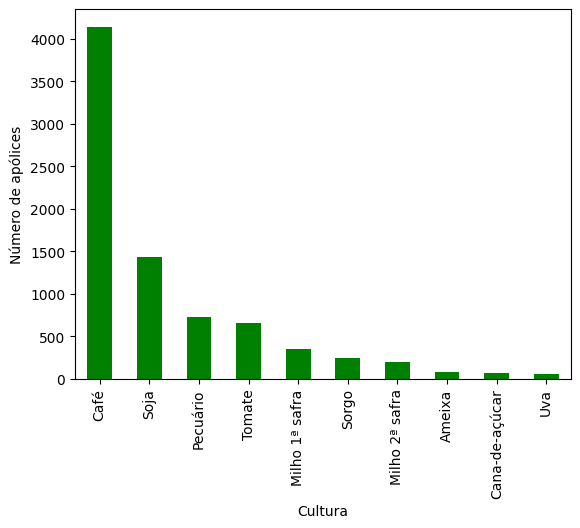

In [ ]:
# gráfico de colunas - 10 culturas com mais apólices no estado
ax = df['cultura'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='', color='green')
ax.set_xlabel('Cultura')
ax.set_ylabel('Número de apólices');

**2 - Interpretação do gráfico de colunas com as dez culturas mais seguradas:**

As dez principais culturas seguradas de MG em 2023 foram, nessa ordem:
- Café (com mais de 4 mil apólices)
- Soja (com quase 1,5 mil apólices)
- Pecuário (com cerca de 800 apólices)
- Tomate (com cerca de 700 apólices)
- Milho 1. safra
- Sorgo
- Milho 2. safra
- Ameixa
- Cana
- Uva

Café e soja concentram as apólices de seguro do estado. As outras não chegam a mil apólices.

Realizar a soma das variáveis de forma separada por cultura para o estado todo:

In [ ]:
# total para todas as culturas
df_todas = df.groupby(by=['cultura']).sum(numeric_only=True)
# mostrar apenas as variáveis de interesse
df_todas.loc[:, ['area', 'animal', 'prod_est', 'prod_seg',
       'total_seg', 'premio', 'subvencao', 'indenizacao', 'sinistro']]

,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao,sinistro
cultura,,,,,,,,,
Abacate,12.50,0,25000.00,25000.00,175000.00,12576.90,5030.76,0.00,0
Abacaxi,40.93,0,450000.00,450000.00,736740.00,30873.04,12349.20,24750.00,5
Abobrinha,2.57,0,60000.00,60000.00,64250.00,2819.95,1127.98,0.00,1
Algodão,290.00,0,4398.00,3518.40,6358503.16,347413.86,36468.62,30741.84,1
Alho,431.60,0,428992.00,428992.00,61222919.32,1277591.22,483914.20,276189.61,6
Ameixa,101.44,0,917596.88,748129.85,4275904.58,1000297.72,388514.29,194997.77,27
Banana,30.73,0,60000.00,60000.00,997147.92,56116.92,22446.76,0.00,1
Batata,351.52,0,1151742.86,847769.28,13313268.85,999666.82,335656.74,90842.54,7
Berinjela,0.98,0,81632.65,73469.39,44000.00,2958.00,1183.20,0.00,0


In [ ]:
# realizar a soma apenas para as 10 culturas com mais apólices do estado

# descobrindo as 10 culturas com mais apólices
df_cult = pd.DataFrame(df['cultura'].value_counts().head(10)).reset_index()
df_cult.columns = ['cultura', 'apolices']
# pegar as linhas no df que correspondam a apólices dessas culturas
df1 = df.merge(df_cult, how='inner')
# realizar a soma das variáveis apenas para essas culturas
df2 = df1.groupby(by=['cultura']).sum(numeric_only=True)
# mostrar apenas as variáveis de interesse
df2.loc[:, ['area', 'animal', 'prod_est', 'prod_seg',
       'total_seg', 'premio', 'subvencao', 'indenizacao', 'sinistro']]

,area,animal,prod_est,prod_seg,total_seg,premio,subvencao,indenizacao,sinistro
cultura,,,,,,,,,
Ameixa,101.44,0,917596.88,748129.85,4275904.58,1000297.72,388514.29,194997.77,27
Café,67065.49,0,3620939.58,2355997.76,1479204345.64,69614203.71,27287367.12,12052464.18,1277
Cana-de-açúcar,8108.84,0,54234.00,52204.40,66017497.48,1662956.05,666297.14,740794.08,29
Milho 1ª safra,16793.13,0,2283867.24,1697930.32,161398312.30,11136908.92,4187208.81,1381958.08,116
Milho 2ª safra,15157.38,0,1073317.62,715112.02,94075321.82,7356848.68,2922196.36,1279263.66,66
Pecuário,0.00,4511,0.00,0.00,396017219.71,6357542.22,2510327.03,2203935.88,210
Soja,156843.71,0,4832966.96,3419222.74,1138419728.20,74061543.37,14552192.32,8441272.62,417
Sorgo,24527.45,0,843786.27,552751.59,91104390.03,5997036.44,2398813.12,1950226.24,64
Tomate,1606.69,0,58210213.94,52270666.60,143166942.67,13767659.07,5503596.74,1793544.47,178


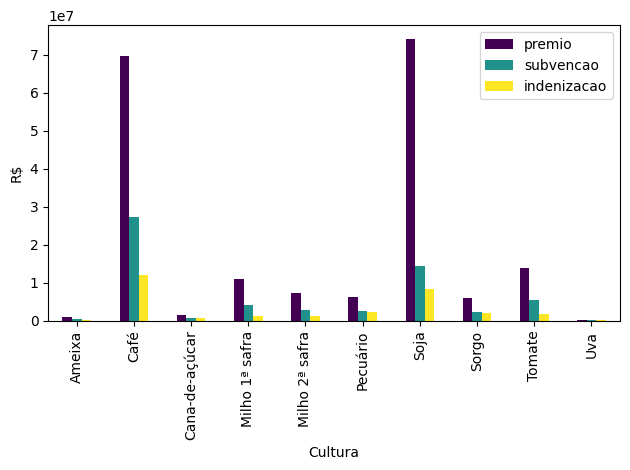

In [ ]:
# fazer um gráfico com os valores de prêmio, subvenção
# e indenização para as 10 culturas mais seguradas
# outras variáveis poderiam ser incluídas no gráfico
df2[['premio','subvencao','indenizacao']].plot.bar(colormap=plt.cm.viridis)
plt.xlabel('Cultura')
plt.ylabel('R$')
plt.tight_layout();

**3 - Interpretação do gráfico comparativo das somas dos valores de prêmio, subvenção e indenização das dez culturas mais seguradas:**

É possível ver que, para nenhuma das culturas, o valor total das indenizações superou o valor total dos prêmios. Isso é bom para as seguradoras, pois, se o contrário acontecesse, elas poderiam ter prejuízos. Com as culturas de café e soja, as mais seguradas em MG em 2023, o valor dos prêmios é muito maior do que as indenizações, o que é bom para as seguradoras. Isso tudo levando em conta as 10 culturas mais seguradas do estado em 2023.

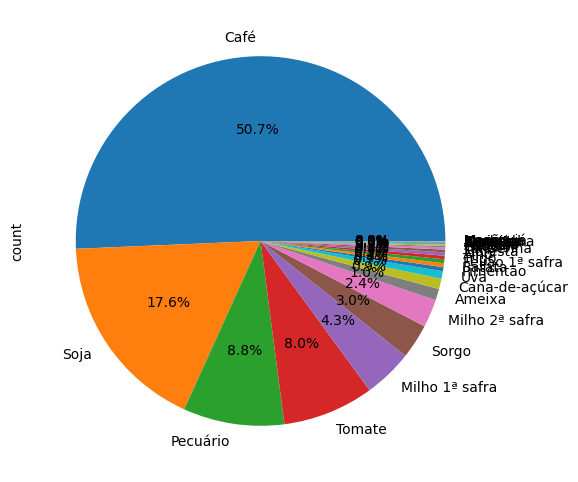

In [ ]:
# gráfico de pizza - todas as culturas no estado
plt.figure(figsize=(10,6))
df['cultura'].value_counts().plot(kind='pie', autopct='%1.1f%%');

**4 - Interpretação do gráfico de pizza com a porcentagem das apólices de cada cultura:**

O café representa mais de metade das apólices do estado de MG e a soja representa 18%. As outras possuem uma representatividade menor, sendo elas: pecuário com 8,8%, tomate, com 8%, milho 1.safra com 4% e as outras são bem menos expressivas.

In [ ]:
# número de apólices por tipo de cultura
df['tipo_cultura'].value_counts()

,count
tipo_cultura,
perenes,4936
grãos,2259
hortaliças,737
frutas,191
leguminosas,28
outros,19


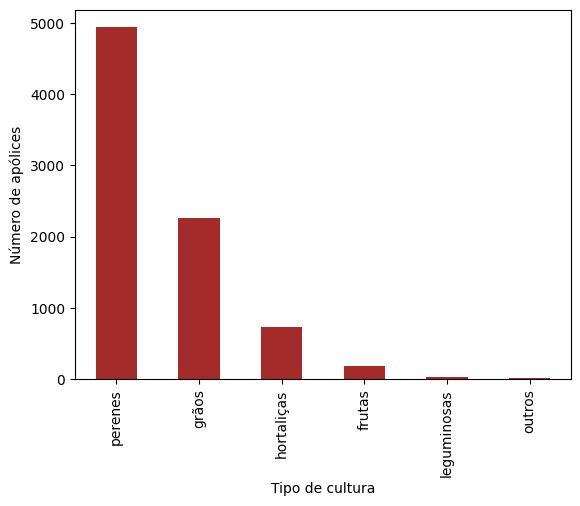

In [ ]:
# gráfico de colunas - tipos de cultura
ax = df['tipo_cultura'].value_counts().plot(kind='bar', color='brown')
ax.set_xlabel('Tipo de cultura')
ax.set_ylabel('Número de apólices');

As culturas perenes (cana, café e pecuário) são responsáveis por quase 5.000 apólices e os grãos por mais de 2.000 apólices em MG. As seguintes são: hortaliças, com 737; frutas; leguminosas e outros. Como já foi observado, em MG, café, soja e pecuário foram os principais seguros feitos em MG em 2023.

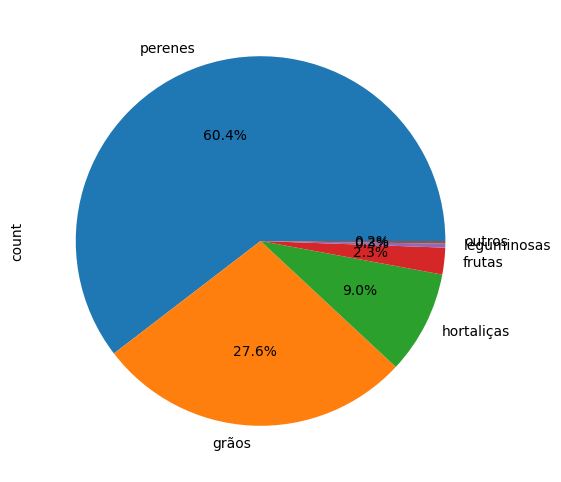

In [ ]:
# gráfico de pizza - tipos de cultura no estado
plt.figure(figsize=(10,6))
df['tipo_cultura'].value_counts().plot(kind='pie', autopct='%1.1f%%');

**5 - Interpretação do gráfico de pizza com a porcentagem das apólices de cada tipo de cultura:**

É a mesma informação do gráfico anterior, porém, considerando a porcentagem das apólices dentro do total. As culturas perenes representam 60% das apólices e os grãos representam quase 28%. As outras juntas representam 12% das apólices.

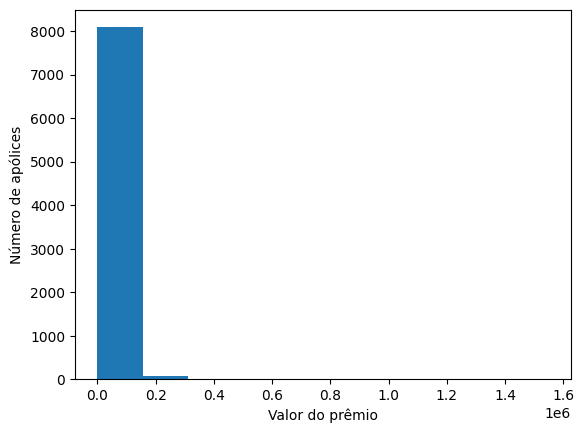

In [ ]:
# histograma dos valores de prêmio
# é possível alterar o número de colunas (bins)
ax = df['premio'].plot(kind='hist', bins=10)
ax.set_ylabel('Número de apólices')
ax.set_xlabel('Valor do prêmio');

**6 - Interpretação do histograma dos valores de prêmio**

No histograma dos valores de prêmio é possível notar que a maioria das apólices (cerca de 8.000) têm prêmios de até R\$150.000,00 (0,15x10^6).

Poderíamos pedir para ver quais são as de valores altos de prêmio:

In [ ]:
df[df['premio'] > 200000]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
1992,278183,3111101,Campina Verde,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,228.00,0,366,3004.00,2403.20,0.80,2946448.39,225253.95,0.08,45050.79,0.00,nenhum,0,0.00
2339,278638,3170206,Uberlândia,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,386.00,0,366,3575.00,2681.25,0.75,3592880.82,284323.15,0.08,56864.63,0.00,geada,1,0.00
2826,274214,3166808,Serra do Salitre,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Batata,hortaliças,68.00,0,365,21300.00,14910.00,0.70,2916444.30,265016.02,0.09,60000.00,0.00,nenhum,0,0.00
2827,276384,3111507,Campos Altos,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Café,perenes,90.00,0,366,2700.00,1755.00,0.65,3898224.14,214402.32,0.05,60000.00,0.00,nenhum,0,0.00
2828,276997,3111507,Campos Altos,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Café,perenes,98.00,0,366,2800.00,1820.00,0.65,3778697.48,207828.36,0.05,60000.00,0.00,nenhum,0,0.00
2829,276990,3166808,Serra do Salitre,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Café,perenes,139.00,0,366,2400.00,1560.00,0.65,4506456.45,220424.50,0.05,60000.00,0.00,nenhum,0,0.00
2831,278396,3103504,Araguari,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Café,perenes,113.00,0,366,3567.00,2318.55,0.65,5467717.92,240104.13,0.04,60000.00,0.00,nenhum,0,0.00
2875,279690,3147006,Paracatu,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,393.00,0,366,3652.00,2739.00,0.75,3749015.82,237153.64,0.06,39527.03,0.00,seca,1,0.00
2895,277183,3145000,Nova Ponte,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,521.00,0,366,3300.00,2475.00,0.75,4821853.38,358636.96,0.07,60000.00,0.00,nenhum,0,0.00
2914,277272,3170107,Uberaba,MG,BRASILSEG COMPANHIA DE SEGUROS,custeio,Soja,grãos,444.00,0,366,3652.00,2739.00,0.75,4571072.00,332217.42,0.07,60000.00,0.00,nenhum,0,0.00


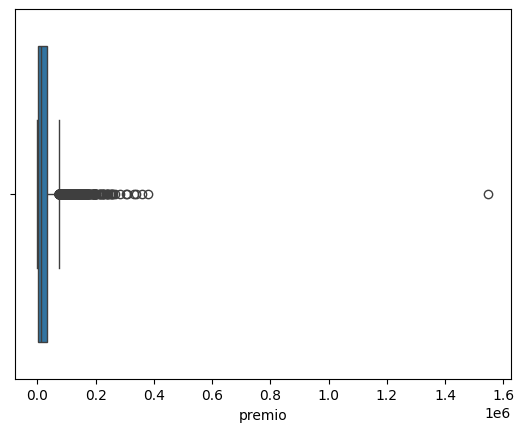

In [ ]:
# boxplot - premio
sns.boxplot(x=df['premio']);

**7 - Interpretação do boxplot dos valores de prêmio**

No boxplot da variável prêmio é possível ver a distribuição dela. A caixinha representa: primeiro, segundo e terceiro quartis que são, respectivamente, 3.300; 11.000 e 31.000 (tudo em reais). Os pontos à direita são os outliers, ou seja, valores discrepantes (não há outliers à esquerda porque não existem valores de prêmio negativos).

In [ ]:
# a informação presente no boxplot
df['premio'].describe()

,premio
count,8170.00
mean,24352.63
std,37627.00
min,166.76
25%,3293.57
50%,11032.23
75%,31416.36
max,1548292.53


# Relação entre as variáveis

In [ ]:
# correlação entre as variáveis numéricas
df.loc[:, ['area', 'animal', 'duracao', 'prod_est', 'prod_seg',
       'nivel_cob', 'total_seg', 'premio', 'taxa', 'subvencao', 'indenizacao',
       'evento', 'sinistro', 'sinistralidade']].corr(numeric_only=True)

,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,sinistro,sinistralidade
area,1.00,-0.00,0.00,-0.01,-0.01,-0.01,0.46,0.46,-0.00,0.06,-0.00,-0.01,-0.00
animal,-0.00,1.00,-0.15,-0.02,-0.02,-0.07,0.16,0.02,-0.05,0.04,-0.01,-0.00,-0.00
duracao,0.00,-0.15,1.00,-0.40,-0.42,-0.33,0.01,0.00,-0.20,0.01,0.01,-0.01,0.01
prod_est,-0.01,-0.02,-0.40,1.00,0.99,0.45,-0.09,-0.02,0.20,0.02,-0.01,-0.02,-0.01
prod_seg,-0.01,-0.02,-0.42,0.99,1.00,0.44,-0.09,-0.03,0.19,0.01,-0.01,-0.02,-0.01
nivel_cob,-0.01,-0.07,-0.33,0.45,0.44,1.00,0.14,0.29,0.42,0.29,0.04,0.00,-0.04
total_seg,0.46,0.16,0.01,-0.09,-0.09,0.14,1.00,0.85,-0.07,0.70,0.01,-0.02,-0.03
premio,0.46,0.02,0.00,-0.02,-0.03,0.29,0.85,1.00,0.20,0.83,0.03,-0.02,-0.03
taxa,-0.00,-0.05,-0.20,0.20,0.19,0.42,-0.07,0.20,1.00,0.24,0.02,0.01,-0.04
subvencao,0.06,0.04,0.01,0.02,0.01,0.29,0.70,0.83,0.24,1.00,0.03,-0.01,-0.04


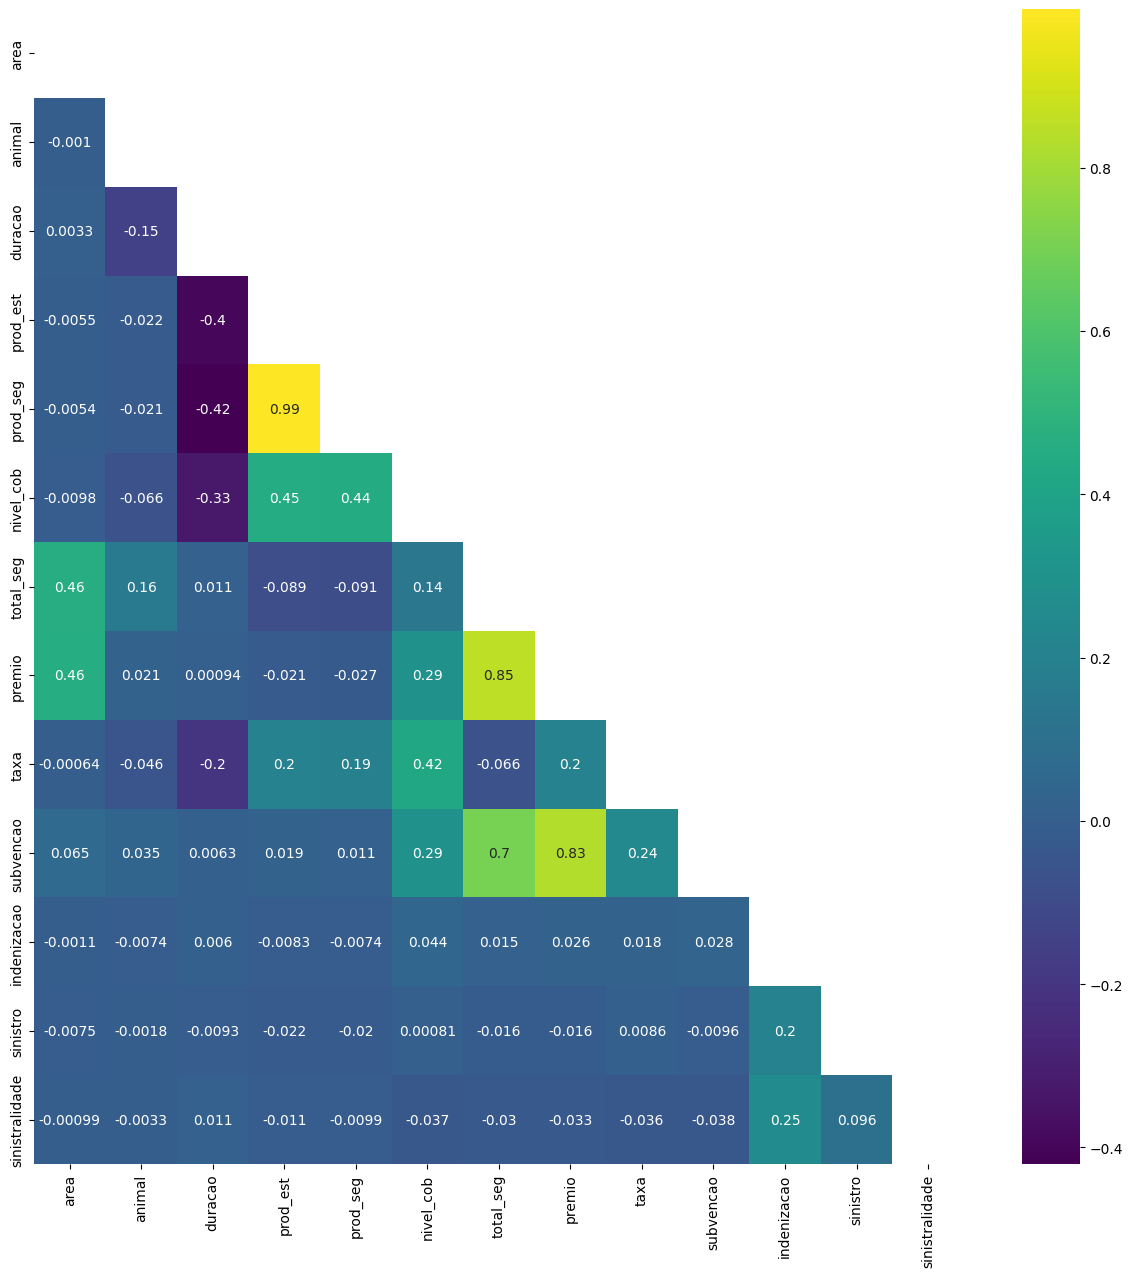

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))         # tamanho da figura
r = df.loc[:, ['area', 'animal', 'duracao', 'prod_est', 'prod_seg',
       'nivel_cob', 'total_seg', 'premio', 'taxa', 'subvencao', 'indenizacao',
       'evento', 'sinistro', 'sinistralidade']].corr(numeric_only=True)
mask = np.zeros_like(r)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(r, cmap='viridis', annot=True, mask=mask, ax=ax); # se tirar o 'mask' aparece a parte superior da matriz

**8 - Interpretação das correlações entre as variáveis:**

As maiores correlações positivas são:
- 0,99: prod_seg e prod_est (correlação positiva quase perfeita)
- 0,85: premio e total_seg (correlação positiva alta: o total segurado e o prêmio são associadas positivamente. Se uma é alta, a outra também é alta)
- 0,83: subvencao e premio (correlação positiva alta, já que o valor de subvenção é concedido como uma porcentagem do valor do prêmio)
- 0,7: subvencao e total_seg (alta correlação positiva)

A maior correlação negativa é:
- -0,42: prod_seg e duracao (a correlação negativa não é alta, pois está longe de -1. Mas a interpretação seria: se a produtividade segurada é alta, a duração tende a ser baixa. Se a produtividade segurada é baixa, a duração tende a ser alta. Se a duração é alta, a produtividade segurada é baixa e vice-versa.)

Lembrar que correlação não implica causalidade.

Diagramas de dispersão: vamos fazer alguns diagramas de dispersão para observar como os pares de variáveis se comportam.

Pares de variáveis que tiveram correlação alta:

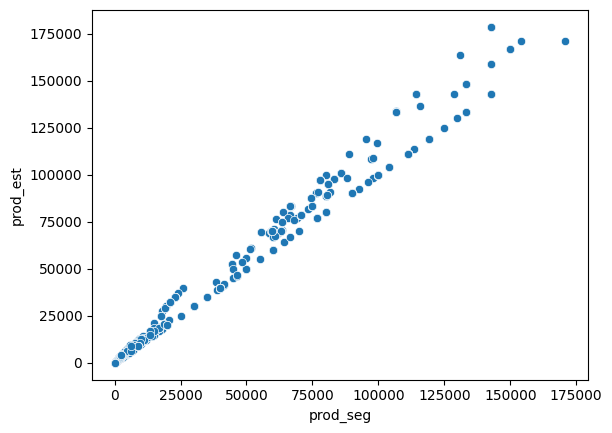

In [ ]:
# diagrama de dispersão entre prod_seg e prod_est
ax = sns.scatterplot(x='prod_seg',
                y='prod_est',
                data=df)
ax.set_title('')
plt.show()

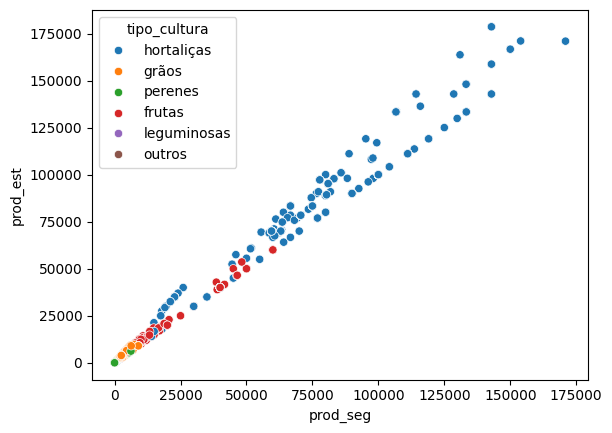

In [ ]:
# diagrama de dispersão entre prod_seg e prod_est
# tipo_cultura nas cores
ax = sns.scatterplot(x='prod_seg',
                y='prod_est',
                hue='tipo_cultura',
                data=df)
ax.set_title('')
plt.show()

In [ ]:
df[df['prod_est'] == df['prod_est'].max()]

,apolice,mun,nome_mun,uf,seguradora,tipo,cultura,tipo_cultura,area,animal,duracao,prod_est,prod_seg,nivel_cob,total_seg,premio,taxa,subvencao,indenizacao,evento,sinistro,sinistralidade
167,1101.75.40116,3165305,São Vicente de Minas,MG,Porto Seguro Companhia de Seguros Gerais,produtividade,Batata,hortaliças,17.92,0,210,178571.43,142857.14,0.80,896000.00,30388.00,0.03,12155.20,0.00,nenhum,0,0.00
5734,1101.75.41791,3165305,São Vicente de Minas,MG,Porto Seguro Companhia de Seguros Gerais,produtividade,Batata,hortaliças,17.92,0,365,178571.43,142857.14,0.80,512000.00,18337.00,0.04,7334.80,0.00,nenhum,0,0.00


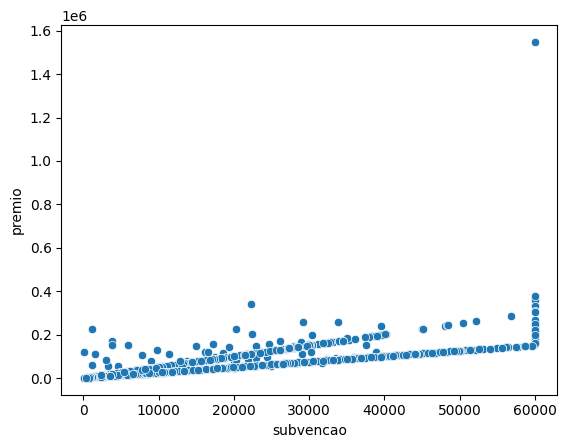

In [ ]:
# diagrama de dispersão entre subvenção e prêmio
ax = sns.scatterplot(x='subvencao',
                y='premio',
                data=df)
ax.set_title('')
plt.show()

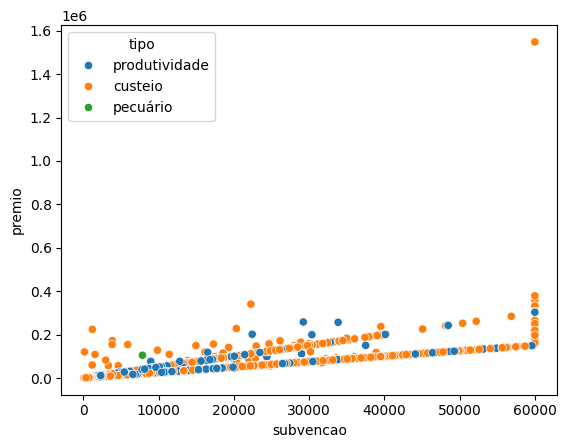

In [ ]:
# diagrama de dispersão entre subvenção e prêmio
# mais tipo de seguro nas cores
ax = sns.scatterplot(x='subvencao',
                y='premio',
                hue='tipo',
                data=df)
ax.set_title('')
plt.show()

Pares de variáveis que tiveram correlação baixa:

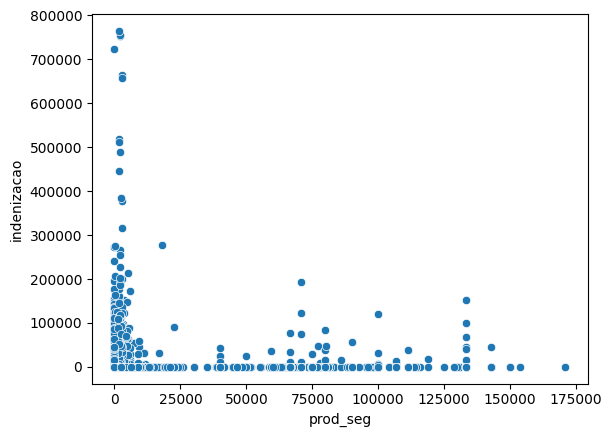

In [ ]:
ax = sns.scatterplot(x='prod_seg',
                y='indenizacao',
                data=df)
ax.set_title('')
plt.show()